Installing OpenCV in Python

In [1]:
pip install opencv-python

     ---------------------------------------- 39.5/39.5 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Installing tensorflow

In [2]:
pip install tensorflow

     -------------------------------------- 390.2/390.2 MB 2.3 MB/s eta 0:00:00
     ------------------------------------ 133.7/133.7 kB 395.7 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 434.5/434.5 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 6.8 MB/s eta 0:00:00
     -------------------------------------- 126.


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Installing matplotlib

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.0/8.0 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 kB 979.8 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.5 MB/s eta 0:00:00


Installing pandas

In [9]:
pip install pandas

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
     ------------------------------------ 507.9/507.9 kB 612.2 kB/s eta 0:00:00
     ------------------------------------ 346.8/346.8 kB 768.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Installing tqdm

In [12]:
pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from glob import glob

Accessing train and test dataset

In [15]:
train_path="dataset/TRAIN"
test_path="dataset/TEST"

Using tensorflow.keras 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout,Activation
from tensorflow.keras.preprocessing.image  import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
import glob

In [19]:
x_data = []
y_data = []

for category in glob.glob(train_path + '/*'):  
    for file in tqdm(glob.glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [00:11<00:00, 864.88it/s] 


In [20]:
data.shape

(22564, 2)

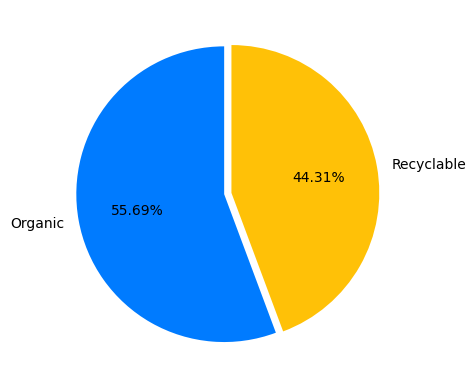

In [21]:
colors = ['#007BFF', '#FFC107']  # Blue and Amber
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()

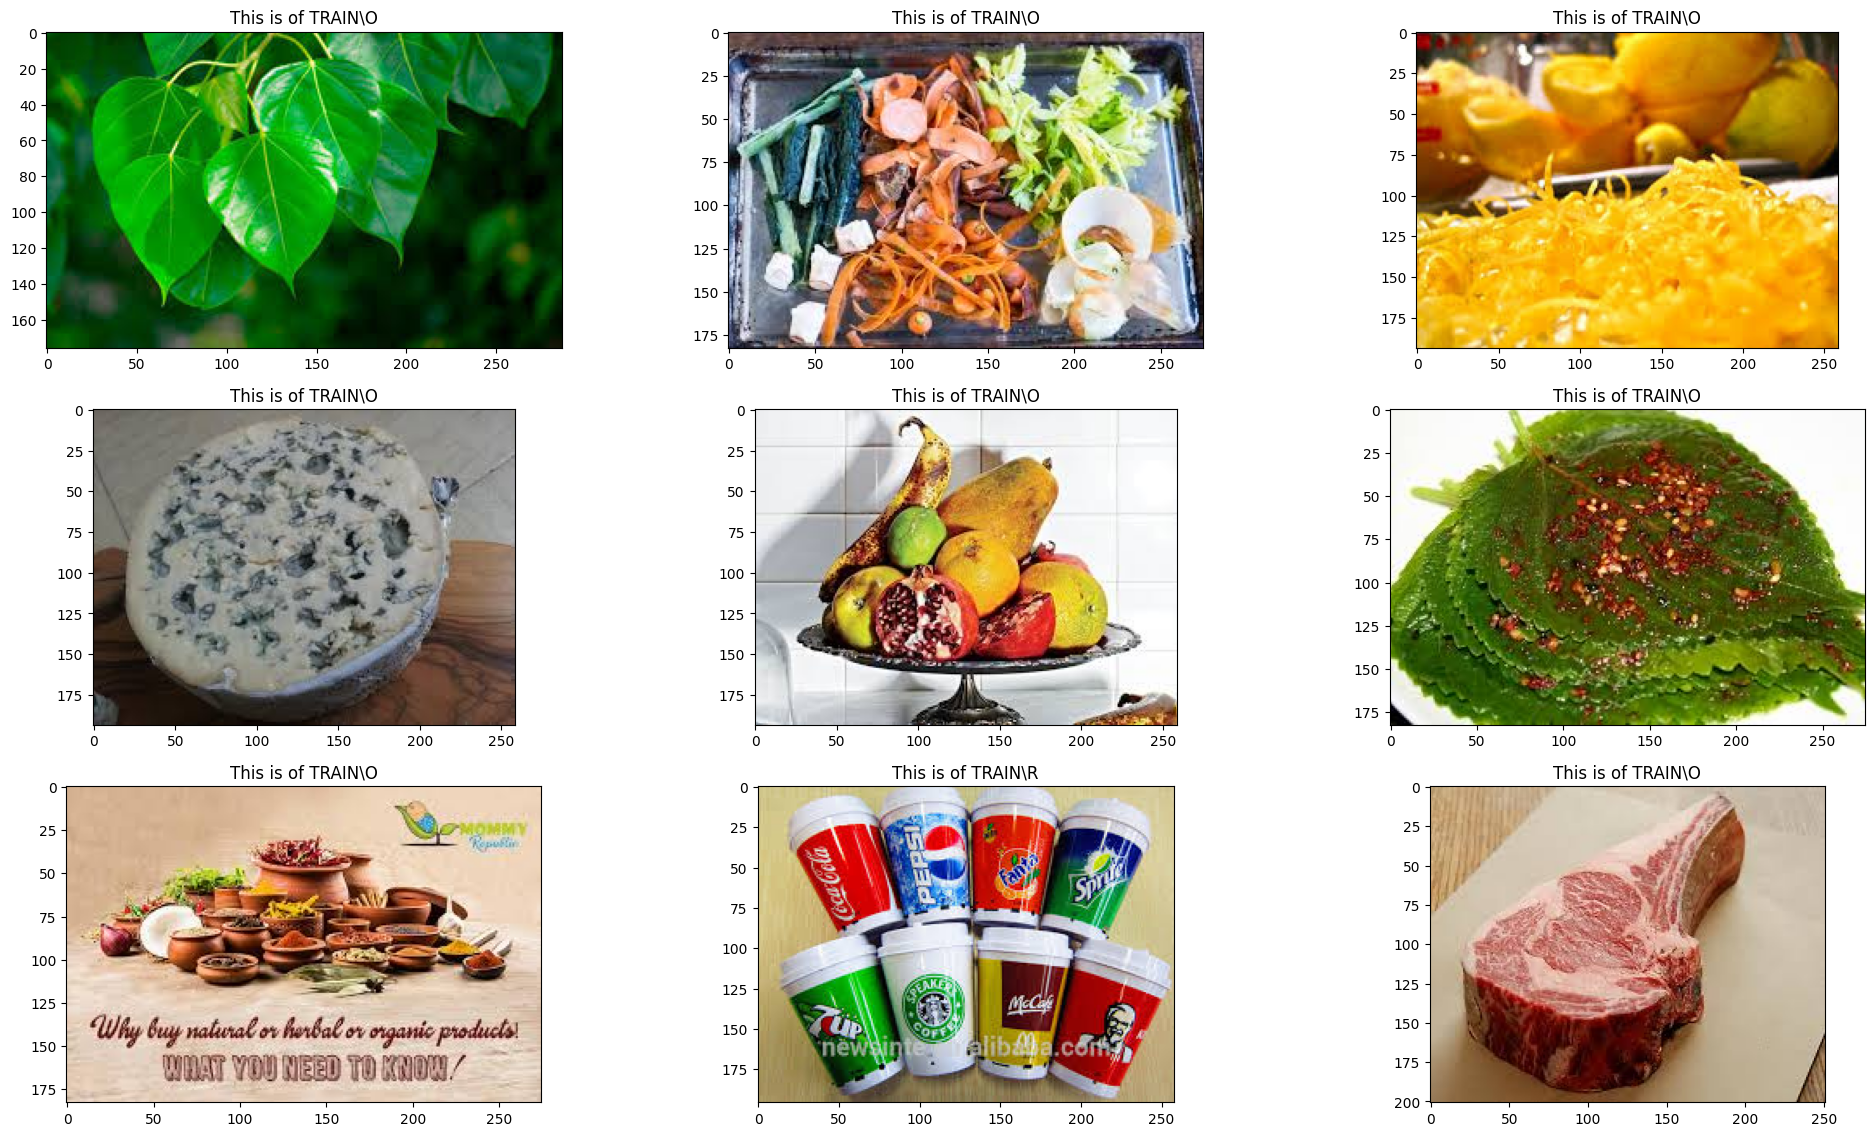

In [29]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i % 12) + 1)
    index = np.random.randint(15000)
    # Corrected the title format
    plt.title('This is of {}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


## CNN-Convolution Neural Network

In [41]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation(('sigmoid')))
model.compile(loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"])
batch_size=256


In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [44]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [45]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [46]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 594s 7s/step - accuracy: 0.7038 - loss: 0.7017 - val_accuracy: 0.8731 - val_loss: 0.3423
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 579s 7s/step - accuracy: 0.8319 - loss: 0.4189 - val_accuracy: 0.8802 - val_loss: 0.3278
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 914s 10s/step - accuracy: 0.8455 - loss: 0.3837 - val_accuracy: 0.9077 - val_loss: 0.2914
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 574s 6s/step - accuracy: 0.8615 - loss: 0.3492 - val_accuracy: 0.8870 - val_loss: 0.3105
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1772s 20s/step - accuracy: 0.8715 - loss: 0.3158 - val_accuracy: 0.8655 - val_loss: 0.3512
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 574s 6s/step - accuracy: 0.8764 - loss: 0.3056 - val_accuracy: 0.9009 - val_loss: 0.2547
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 564s 6s/step - accuracy: 0.9024 - loss: 0.2522 - val_accuracy: 0.8874 - val_loss: 0.2899
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 573s 6s/step - accuracy: 0.9143 - loss: 0.2203 - val_accuracy: 0.9013 